In [3]:
%cd shared/Band1/


/shared/Band1


In [248]:
import rasterio
import rasterio.features
import rasterio.warp
import rasterio.plot
from rasterio.mask import mask
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from osgeo import gdalnumeric
import pandas as pd
cropshape = gpd.read_file('Crops_2016/2016_Crops.shp')
#cropshape.crs = {"init": 'epsg:26910'}
#cropshape = cropshape.to_crs('+proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs')
#cropshape.crs

In [247]:
%cd GeoSpatial-Classification/

/home/rus/GeoSpatial-Classification


In [222]:
actuallist = sorted(os.listdir())[:-6]
actuallist

['2409443.jp2',
 '2410507.jp2',
 '2421884.jp2',
 '2427901.jp2',
 '2428538.jp2',
 '2443846.jp2',
 '2443847.jp2',
 '2445030.jp2',
 '2702369.jp2',
 '2770078.jp2',
 '2770079.jp2',
 '2770462.jp2',
 '2770463.jp2',
 '2770898.jp2',
 '2770899.jp2',
 '2770900.jp2',
 '2771102.jp2',
 '2771103.jp2',
 '2771489.jp2',
 '2771490.jp2',
 '2771691.jp2',
 '2771692.jp2',
 '2771693.jp2',
 '2772757.jp2',
 '2772758.jp2',
 '2772759.jp2',
 '2804451.jp2',
 '2804452.jp2',
 '2875156.jp2',
 '2875157.jp2',
 '2875158.jp2',
 '2875159.jp2',
 '2875160.jp2',
 '2875161.jp2',
 '2875162.jp2',
 '2875163.jp2',
 '2875164.jp2',
 '2875520.jp2',
 '2875945.jp2',
 '2875946.jp2',
 '2875947.jp2',
 '2875948.jp2',
 '2875949.jp2',
 '2875950.jp2',
 '2875951.jp2',
 '2875952.jp2',
 '2876569.jp2',
 '2876570.jp2',
 '2876571.jp2',
 '2876572.jp2',
 '2876573.jp2',
 '2876574.jp2',
 '2876575.jp2',
 '2876576.jp2',
 '2877283.jp2',
 '2877284.jp2',
 '2877285.jp2',
 '2877286.jp2',
 '2877287.jp2',
 '2877288.jp2',
 '2877289.jp2',
 '2877290.jp2',
 '288696

In [216]:
%cd ..
%cd Band9/

/shared
/shared/Band9


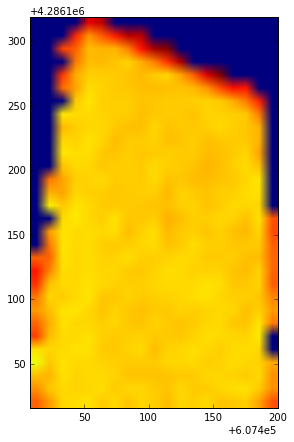

In [172]:
pic1 = rasterio.open('4102736.jp2')

fig,ax = plt.subplots(1,figsize=(7,7))
bounds = rasterio.plot.plotting_extent(pic1)
rasterio.plot.show(pic1,with_bounds=True, extent = bounds, ax=ax)

In [173]:
pic1.close()

In [70]:
actuallist = sorted(direct)[:-6]
len(actuallist)

15332

In [74]:
band3test = pd.DataFrame(index=range(len(actuallist)),columns=['OBJECTID','firstquart','med','thirdquart'])

In [107]:
stuff = pic1.read()
stuffers =  [np.percentile(stuff,25), np.mean(stuff), np.percentile(stuff,75)]

In [90]:
pd.DataFrame([one,two,three])

,0
0,255.000000
1,562.851754
2,1056.000000


In [36]:
firstarray = pic1.read()

In [169]:
tester = [[None,None,None,None]]*len(actuallist)

In [170]:
for i in  range(len(actuallist)):
    pic1 = rasterio.open(actuallist[i])
    reader = pic1.read()
    reader2 = reader[reader!= 0]
    try:
        stuffers = [actuallist[i][:-4],np.percentile(reader2,40),np.mean(reader2),np.percentile(reader2,75)]
    except IndexError:
        stuffers = [actuallist[i][:-4],0,0,0]
    pic1.close()
    tester[i] = stuffers
    

In [161]:
reader.squeeze().sq

array([1121, 1084, 1017, 1235, 1001, 1028, 1084, 1002, 1042,  950, 1001,
        995, 1040,  951, 1026, 1148, 1193,  999, 1076, 1132, 1110,  945,
       1065, 1100,  949, 1117, 1073,  255,  255,  255,  255,  255,  255,
        255,  255,  255,  255,  255,  255,  255,  255,  255,  255,  255,
        255,  255,  255,  255,  255,  255,  255,  255,  255,  255], dtype=uint16)

'3050642.jp2'

In [205]:
def bandcollector(path):
    os.chdir('..')
    os.chdir(path)
    tester = [[None,None,None,None]]*len(actuallist)
    for i in  range(len(actuallist)):
        pic1 = rasterio.open(actuallist[i])
        reader = pic1.read()
        reader2 = reader[reader!= 0]
        try:
            stuffers = [actuallist[i][:-4],np.percentile(reader2,40),np.mean(reader2),np.percentile(reader2,75)]
        except IndexError:
            stuffers = [actuallist[i][:-4],0,0,0]
        pic1.close()
        tester[i] = stuffers
        findf = pd.DataFrame([i for i in tester],columns=['OBJECTID',path+'first',path+'mean',path+'third'])
    return(findf)



In [200]:
band3 = bandcollector('Band3')


In [202]:
band2 =bandcollector('Band2')

In [203]:
band4 = bandcollector('Band4')
band5 = bandcollector('Band5')
band6 = bandcollector('Band6')
band7 = bandcollector('Band7')
band8 = bandcollector('Band8')

In [223]:
band1 = bandcollector('Band1')
band9 = bandcollector('Band9')
band10 = bandcollector('Band10')

In [244]:
bands = band1.merge(band2)
bands = bands.merge(band3)
bands = bands.merge(band4)
bands = bands.merge(band5)
bands = bands.merge(band6)
bands = bands.merge(band7)
bands = bands.merge(band8)
bands = bands.merge(band9)
bands = bands.merge(band10)

In [262]:

bands['OBJECTID'][5]


'2443846'

In [267]:
cropshape['OBJECTID'] = cropshape['OBJECTID'].astype(str)


In [269]:
CbandDensity = bands.merge(cropshape)

In [270]:
%ls

Boundary Extraction Ryan.ipynb
Convoluted Shapefile, Crop Extracter.ipynb
Cropattempt2.ipynb
CropFieldSatImage.ipynb
CropGenus.ipynb
Crops_2016/
Crop Satellite image hopefully.ipynb
Databasereader.ipynb
DFmaker.ipynb
Extract_fields_dataBradysfile.ipynb
Extract_fields_data_FIx_pictures.ipynb
Extract_fields.ipynb
m_3812101_se_10_h_20160711.tif*
MakeColorBands.ipynb
NOT_RELEVANT_Data_resizing_and_extracting.ipynb
NOT_RELEVANT_Marcel_Reproject_image.ipynb
pca.png
pca.tif
pictures/
PixelBoxBrady.ipynb
Plot RGB Sat Bands.ipynb
SEMI_RELEVANT_learning_to_georeference.ipynb
Terminal tester.ipynb
test1.png
todo.txt
Untitled1.ipynb
Untitled.ipynb
Yolocropper_deprecated.ipynb


In [271]:
CbandDensity.to_csv('ColorbandsDF')